### YouTube Analysis
- Data pulled from YouTube using its API (_YouTube Data API v3_)
- Content related to the following YouTube channels:
 - Curbal
 - techTFQ
 - Alex The Analyst
 - Corey Schafer
 - Guy in a Cube


In [3]:
# Importing the required libraries
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build


In [5]:
# Getting the YouTube service
api_key = 'xxxxxx'  # <-- Replace it with a valid API key
api_service_name = 'youtube'
api_version = 'v3'
youtube = build(api_service_name, api_version, developerKey = api_key)


In [6]:
# Creating a list of the YouTube channels
channels = ['UCJ7UhloHSA4wAqPzyi6TOkw',
            'UCnz-ZXXER4jOvuED5trXfEA',
            'UC7cs8q-gJRlGwj4A8OmCmXg',
            'UCCezIgC97PvUuR4_gbFUs5g',
            'UCFp1vaKzpfvoGai0vE5VJ0w'
           ]


---

### Overall Channels Metrics

Getting high level statistics of all the channels (number of views, subscribers and videos):

In [7]:
# Creating a function to pull data from the channels
def getChannelData(channel_ids):
    ids = ','.join(channel_ids)  # <-- The 'id' parameter accepts a comma-separated list of the channel ids
    
    # Creating a dictionary and a list that will host the results returned by the API
    data = dict()
    all_channels = list()
    
    request = youtube.channels().list(
                part = 'snippet,contentDetails,statistics',
                id = ids)
    response = request.execute()
    
    # Specifying the actual data that will be extracted 
    for i in range(0, len(response['items'])):
        data['Channel'] = response['items'][i]['snippet']['title']
        data['Subscribers'] = response['items'][i]['statistics']['subscriberCount']
        data['Videos'] = response['items'][i]['statistics']['videoCount']
        data['Views'] = response['items'][i]['statistics']['viewCount']
        data['PlaylistIds'] = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        all_channels.append(data.copy())
    
    return all_channels


In [8]:
# Inspecting the data generated by the function above
stats_all_channels = getChannelData(channels)
stats_all_channels


[{'Channel': 'Guy in a Cube',
  'Subscribers': '250000',
  'Videos': '738',
  'Views': '18891096',
  'PlaylistIds': 'UUFp1vaKzpfvoGai0vE5VJ0w'},
 {'Channel': 'techTFQ',
  'Subscribers': '59900',
  'Videos': '54',
  'Views': '2516462',
  'PlaylistIds': 'UUnz-ZXXER4jOvuED5trXfEA'},
 {'Channel': 'Corey Schafer',
  'Subscribers': '908000',
  'Videos': '230',
  'Views': '70570743',
  'PlaylistIds': 'UUCezIgC97PvUuR4_gbFUs5g'},
 {'Channel': 'Curbal',
  'Subscribers': '90700',
  'Videos': '871',
  'Views': '11960780',
  'PlaylistIds': 'UUJ7UhloHSA4wAqPzyi6TOkw'},
 {'Channel': 'Alex The Analyst',
  'Subscribers': '191000',
  'Videos': '135',
  'Views': '7370234',
  'PlaylistIds': 'UU7cs8q-gJRlGwj4A8OmCmXg'}]

In [9]:
# Creating a dataframe based on the dictionary extracted from the API
df_stats = pd.DataFrame(stats_all_channels)
df_stats


,Channel,Subscribers,Videos,Views,PlaylistIds
0,Guy in a Cube,250000,738,18891096,UUFp1vaKzpfvoGai0vE5VJ0w
1,techTFQ,59900,54,2516462,UUnz-ZXXER4jOvuED5trXfEA
2,Corey Schafer,908000,230,70570743,UUCezIgC97PvUuR4_gbFUs5g
3,Curbal,90700,871,11960780,UUJ7UhloHSA4wAqPzyi6TOkw
4,Alex The Analyst,191000,135,7370234,UU7cs8q-gJRlGwj4A8OmCmXg


In [10]:
# Checking data types
df_stats.dtypes


Channel        object
Subscribers    object
Videos         object
Views          object
PlaylistIds    object
dtype: object

In [11]:
# Making the columns 'Views', 'Subscribers', and 'Videos' numerical (they're currently strings)
df_stats['Subscribers'] = df_stats['Subscribers'].astype(int)
df_stats['Videos'] = df_stats['Videos'].astype(int)
df_stats['Views'] = (df_stats['Views'].astype(int)) / 1000  # View numbers are usually high. Dividing it by 1000 for ease of use 
df_stats.dtypes


Channel         object
Subscribers      int64
Videos           int64
Views          float64
PlaylistIds     object
dtype: object

---

Analysing the metrics extracted from YouTube so far:

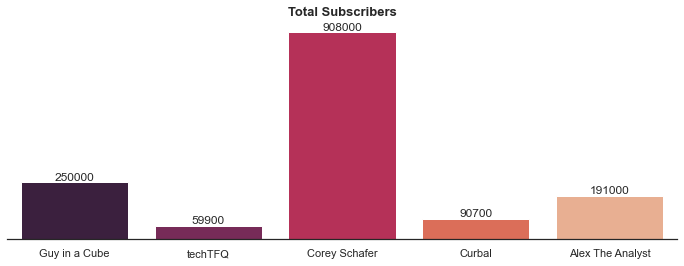

In [12]:
# Visualising the number of 'Subscribers' for all the channels
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel', y = 'Subscribers', data = df_stats, palette = 'rocket')
ax.set_title('Total Subscribers', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


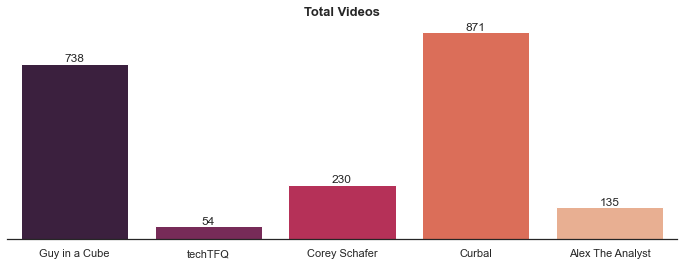

In [13]:
# Visualising the number of 'Videos' for all the channels
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel', y = 'Videos', data = df_stats, palette = 'rocket')
ax.set_title('Total Videos', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)

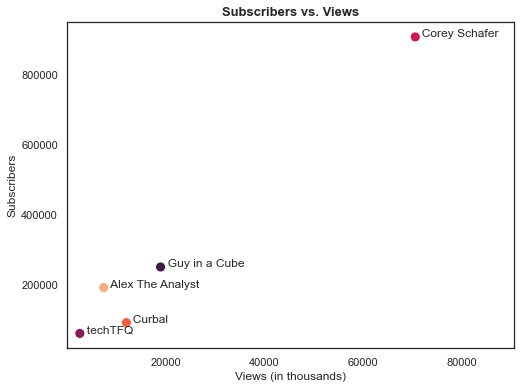

In [14]:
# Comparing Subscribers and Views
sns.set(rc = {'figure.figsize': (8, 6)})
sns.set_style(style = 'white') 
ax = sns.scatterplot(data = df_stats, x = "Views", y = "Subscribers", hue = 'Channel', s = 100, legend = False, palette = 'rocket')
ax.set_title('Subscribers vs. Views', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Views (in thousands)')

# Formatting the chart to include the names of the channels as annotations
for i, txt in enumerate(df_stats['Channel']):
    ax.annotate('  ' + txt, (df_stats['Views'][i], df_stats['Subscribers'][i]))

plt.xlim((1, df_stats['Views'].max() + 20000))

plt.show()


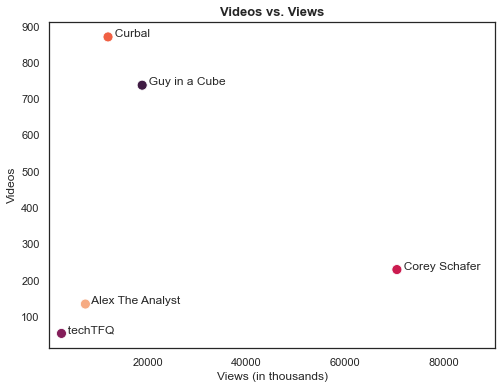

In [15]:
# Comparing Videos and Views
sns.set(rc = {'figure.figsize': (8, 6)})
sns.set_style(style = 'white') 
ax = sns.scatterplot(data = df_stats, x = "Views", y = "Videos", hue = 'Channel', s = 100, legend = False, palette = 'rocket')
ax.set_title('Videos vs. Views', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Views (in thousands)')

# Formatting the chart to include the names of the channels as annotations
for i, txt in enumerate(df_stats['Channel']):
    ax.annotate('  ' + txt, (df_stats['Views'][i], df_stats['Videos'][i]))

plt.xlim((1, df_stats['Views'].max() + 20000))
plt.show()


---

It seems that Subscribers and Views have a __positive__ correlation. Let's visualise it:

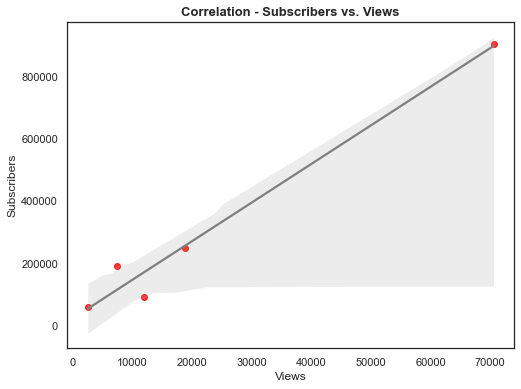

In [16]:
# Plotting the correlation between Subscribers and Views
ax = sns.regplot(x = 'Views', y = 'Subscribers', data = df_stats, scatter_kws = {'color':'red'}, line_kws = {'color':'grey'})
ax.set_title('Correlation - Subscribers vs. Views', weight = 'semibold').set_fontsize('13')


In fact, Subscribers and Views are the only metrics __positively correlated__, which means that they tend to move in the same direction (i.e. the number of Views tend to be higher as the number of Subscribers grow).

The remaining metrics, on the other hand, have negative correlations, as shown in the following Correlation Matrix:

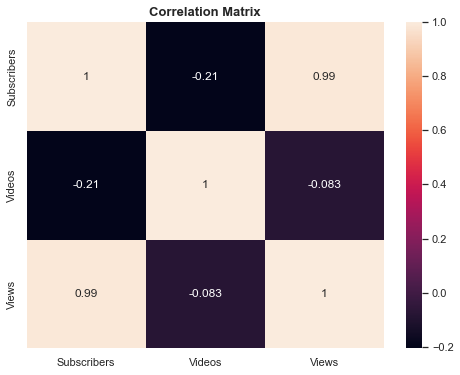

In [17]:
# Generating a correlation matrix
ax = sns.heatmap(df_stats.corr(), annot= True)
ax.set_title('Correlation Matrix', weight = 'semibold').set_fontsize('13')


---

### Individual Videos

Let's get some more data from YouTube to take a closer look at the __videos__ from these channels:

In [18]:
# Getting the playlist ids from the dataframe used previously
playlists = df_stats['PlaylistIds']
playlists


0    UUFp1vaKzpfvoGai0vE5VJ0w
1    UUnz-ZXXER4jOvuED5trXfEA
2    UUCezIgC97PvUuR4_gbFUs5g
3    UUJ7UhloHSA4wAqPzyi6TOkw
4    UU7cs8q-gJRlGwj4A8OmCmXg
Name: PlaylistIds, dtype: object

In [19]:
# Creating a function to get the videos ids for each channel
def getVideoIds(playlist_ids):
    
    # Creating a dictionary and a list that will host the results returned by the API
    all_video_ids = list()
    
    for playlist in playlist_ids:
        # Getting data from the first page of results
        # The default number of items returned is 5 (setting it to the maximum value allowed: 50)
        request = youtube.playlistItems().list(
                    part = 'snippet,contentDetails',
                    playlistId = playlist,
                    maxResults = 50)   
        response = request.execute()

        # Specifying the actual data that will be extracted 
        for i in range(0,len(response['items'])):
            all_video_ids.append(response['items'][i]['snippet']['resourceId']['videoId'])


        # Handling pagination
        next_page_token = response.get('nextPageToken')
        next_page = True

        while next_page:
            if next_page_token == None:
                next_page = False
            else:
                request = youtube.playlistItems().list(
                    part = 'snippet,contentDetails',
                    playlistId = playlist,
                    maxResults = 50,
                    pageToken = next_page_token)  # <-- If there are more pages, the parameter 'pageToken' is required
                response = request.execute()

                for i in range(0,len(response['items'])):
                    all_video_ids.append(response['items'][i]['snippet']['resourceId']['videoId'])
            # Updating the 'next_page_token' variable as it loops through the pages
            next_page_token = response.get('nextPageToken')  
        
    return all_video_ids
      

In [20]:
# Saving the results returned by the function above (all video ids) in a variable
videos = getVideoIds(playlists)
 

In [21]:
# Creating a function to pull details from each video
def getVideoData(video_ids):
    
    # Creating a dictionary and a list that will host the results returned by the API
    data = dict()
    all_videos = list()

    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                        part = 'snippet,contentDetails,statistics',
                        id = ','.join(video_ids[i:i+50]),
                        maxResults = 50)
        response = request.execute()  
        
        for video in response['items']:
            
            data['Channel_name'] = video['snippet']['channelTitle']
            data['Channel_id'] = video['snippet']['channelId']
            data['Video_title'] = video['snippet']['title']
            data['Video_id'] = video_ids[i]
            data['Video_duration'] = video['contentDetails']['duration']
            data['Video_publication'] = video['snippet']['publishedAt']
            data['Video_views'] = video['statistics']['viewCount']
            data['Video_likes'] = video['statistics'].get('likeCount')
            data['Video_comments'] = video['statistics']['commentCount']
            data['Video_tags'] = video['snippet'].get('tags')
            
            all_videos.append(data.copy())
    
    return all_videos


---

Preparing the __videos__ data for analysis:

In [22]:
# Creating a dataframe based on the Videos details data
df_videos_stats = pd.DataFrame(getVideoData(videos))
df_videos_stats.head(3)


,Channel_name,Channel_id,Video_title,Video_id,Video_duration,Video_publication,Video_views,Video_likes,Video_comments,Video_tags
0,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,Can Patrick handle the challenge???,twsuBaiPaCk,PT6M53S,2022-03-23T15:00:34Z,2979,158,10,"[advanced excel, excel tips and tricks, how to..."
1,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,REPLAY Power BI tips from the Pros - LIVE (Mar...,twsuBaiPaCk,PT1H16M27S,2022-03-19T15:43:14Z,3792,73,2,"[power bi, power bi desktop, power bi premium,..."
2,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,Some tips for your data labels in Power BI,twsuBaiPaCk,PT4M28S,2022-03-17T15:00:22Z,8056,267,13,"[business intelligence, data analytics, introd..."


In [23]:
# Checking the data types of all columns 
df_videos_stats.dtypes


Channel_name         object
Channel_id           object
Video_title          object
Video_id             object
Video_duration       object
Video_publication    object
Video_views          object
Video_likes          object
Video_comments       object
Video_tags           object
dtype: object

In [24]:
# Converting video duration (currently, it is an ISO 8601 duration) to seconds
df_videos_stats['Video_duration'] = pd.to_timedelta(df_videos_stats['Video_duration']).dt.total_seconds()


In [25]:
# Changing the format of the 'Video_publication' from string to date
df_videos_stats['Video_publication'] = pd.to_datetime(df_videos_stats['Video_publication']).dt.date


In [26]:
# Converting the columns 'Video_views', 'Video_likes', and 'Video_comments' to numeric
df_videos_stats['Video_views'] = df_videos_stats['Video_views'].astype(int) / 1000
df_videos_stats['Video_likes'] = df_videos_stats['Video_likes'].astype(pd.Int64Dtype())
df_videos_stats['Video_comments'] = df_videos_stats['Video_comments'].astype(int)
df_videos_stats.head(3)


,Channel_name,Channel_id,Video_title,Video_id,Video_duration,Video_publication,Video_views,Video_likes,Video_comments,Video_tags
0,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,Can Patrick handle the challenge???,twsuBaiPaCk,413.0,2022-03-23,2.979,158,10,"[advanced excel, excel tips and tricks, how to..."
1,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,REPLAY Power BI tips from the Pros - LIVE (Mar...,twsuBaiPaCk,4587.0,2022-03-19,3.792,73,2,"[power bi, power bi desktop, power bi premium,..."
2,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,Some tips for your data labels in Power BI,twsuBaiPaCk,268.0,2022-03-17,8.056,267,13,"[business intelligence, data analytics, introd..."


---

Visualising the top performing __videos__ from all channels:
- The criterion used to determine the top 10 videos is their number of __views__

In [27]:
# Creating a subset of the data, which contains the top 10 videos from each channel
top10_videos = df_videos_stats.groupby(['Channel_name']).apply(lambda x: x.sort_values(['Channel_name', 'Video_views'], ascending = False)).reset_index(drop = True)
top10_videos = top10_videos.groupby(['Channel_name']).head(10)


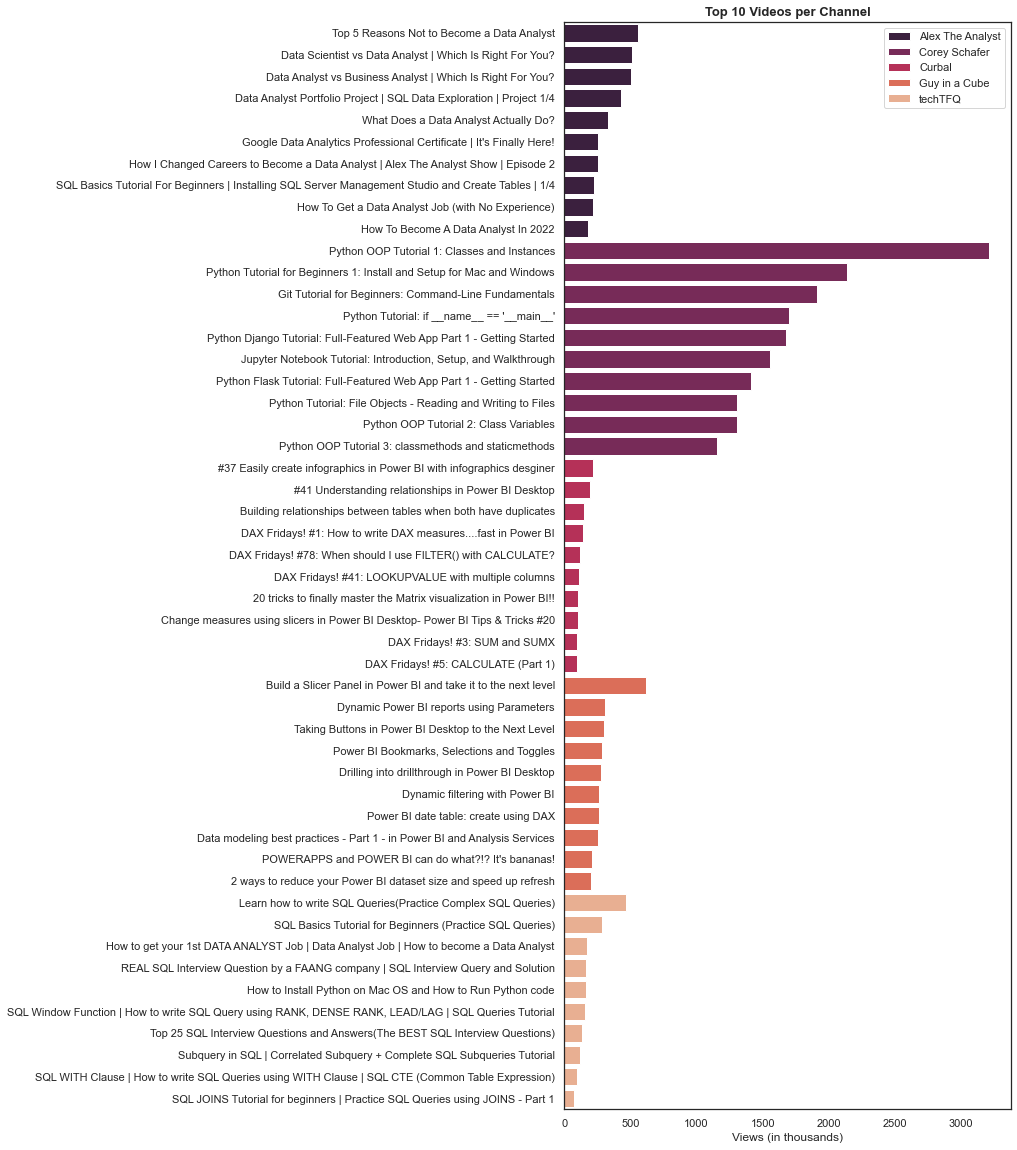

In [31]:
# Plotting the number of Views for the top 10 videos
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_views', y = 'Video_title', hue = 'Channel_name', data = top10_videos, palette = 'rocket', dodge = False)
ax.set_title('Top 10 Videos per Channel', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Views (in thousands)')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()


---

Now, let's visualise the number of Likes and Comments these Top 10 Videos received:

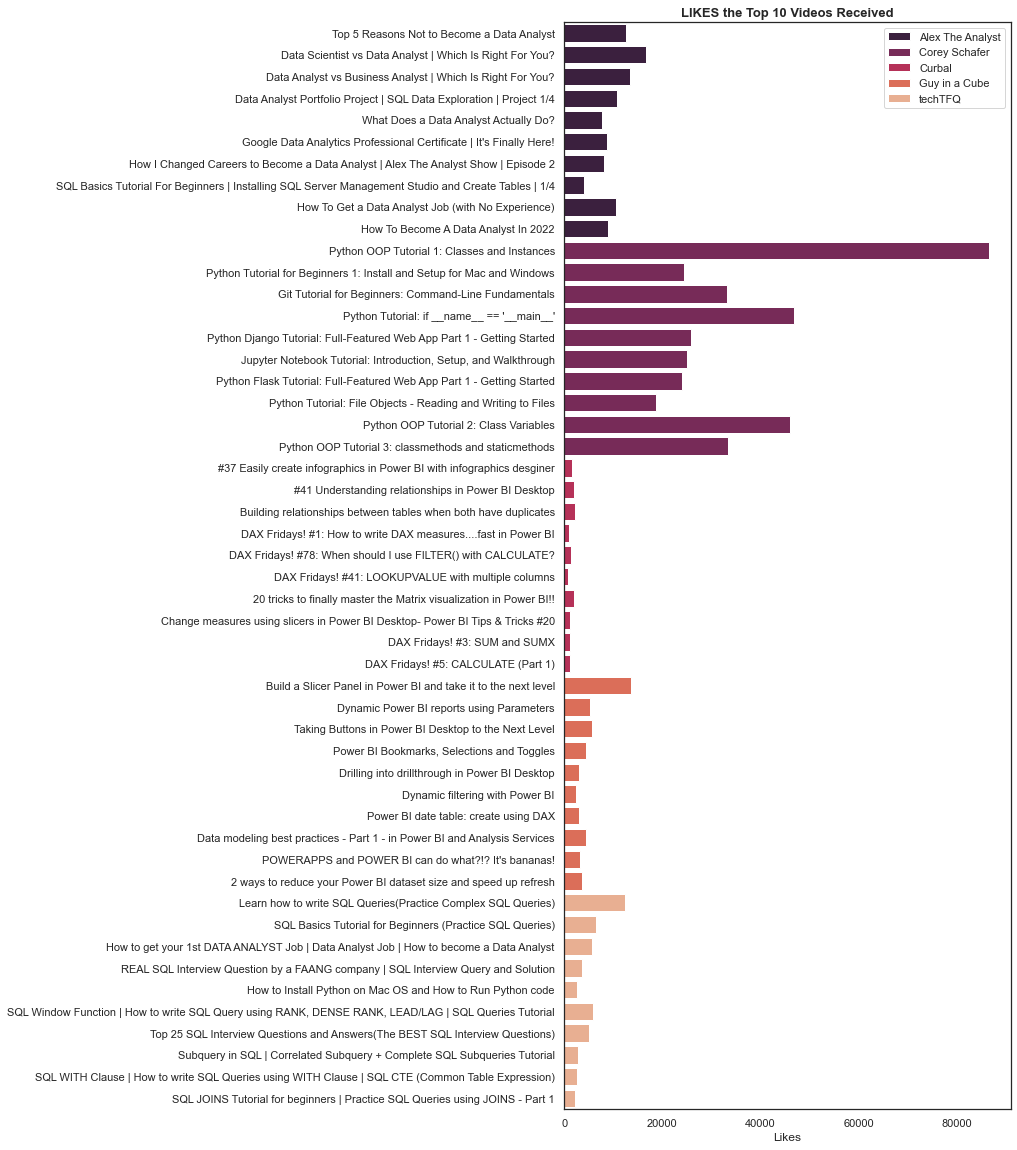

In [29]:
# Plotting the number of Likes
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_likes', y = 'Video_title', hue = 'Channel_name', data = top10_videos, palette = 'rocket', dodge = False)
ax.set_title('LIKES the Top 10 Videos Received', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Likes')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()


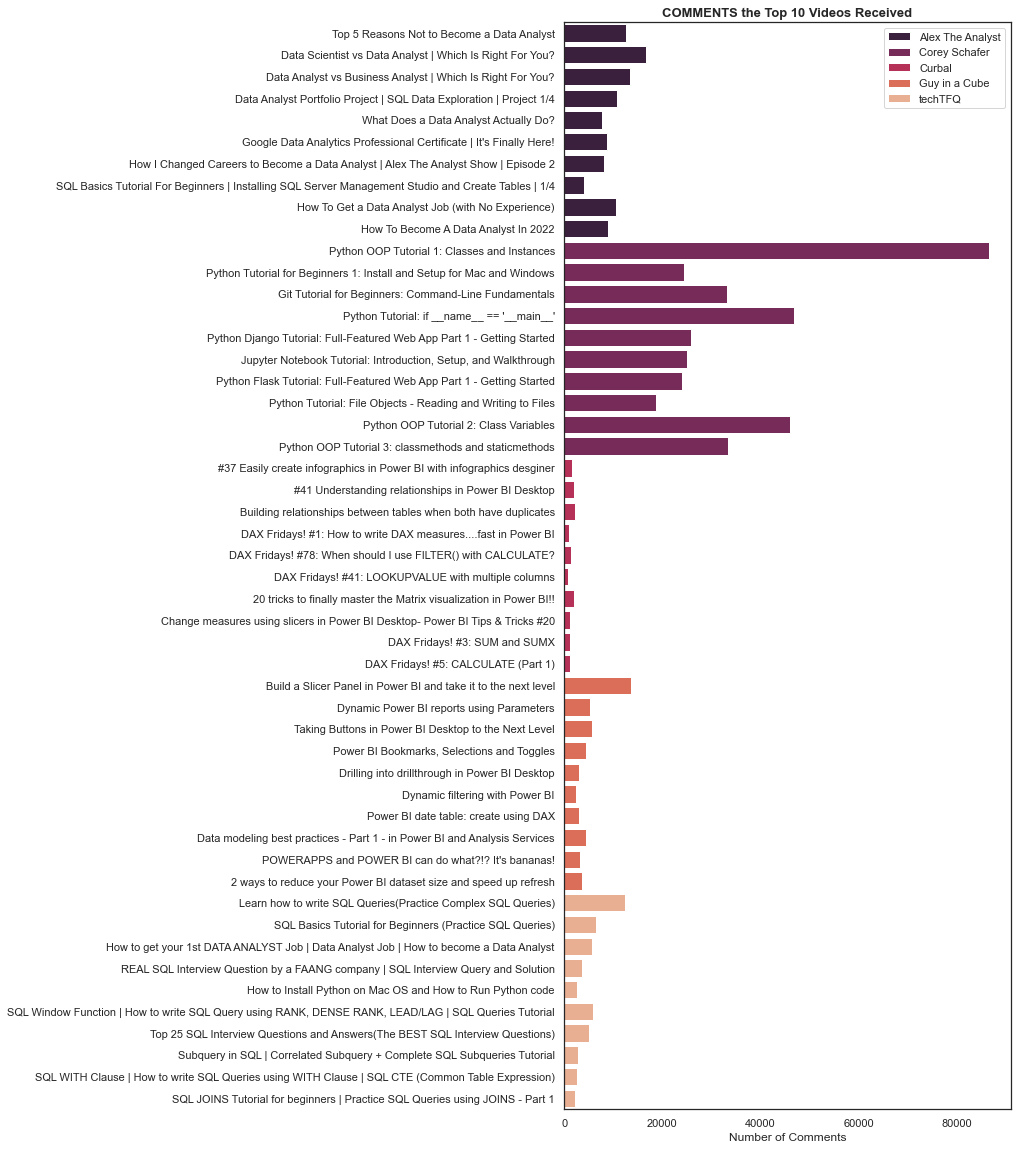

In [32]:
# Plotting the number of Comments
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_likes', y = 'Video_title', hue = 'Channel_name', data = top10_videos, palette = 'rocket', dodge = False)
ax.set_title('COMMENTS the Top 10 Videos Received', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Number of Comments')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()


---

Duration of the Top 10 Videos:

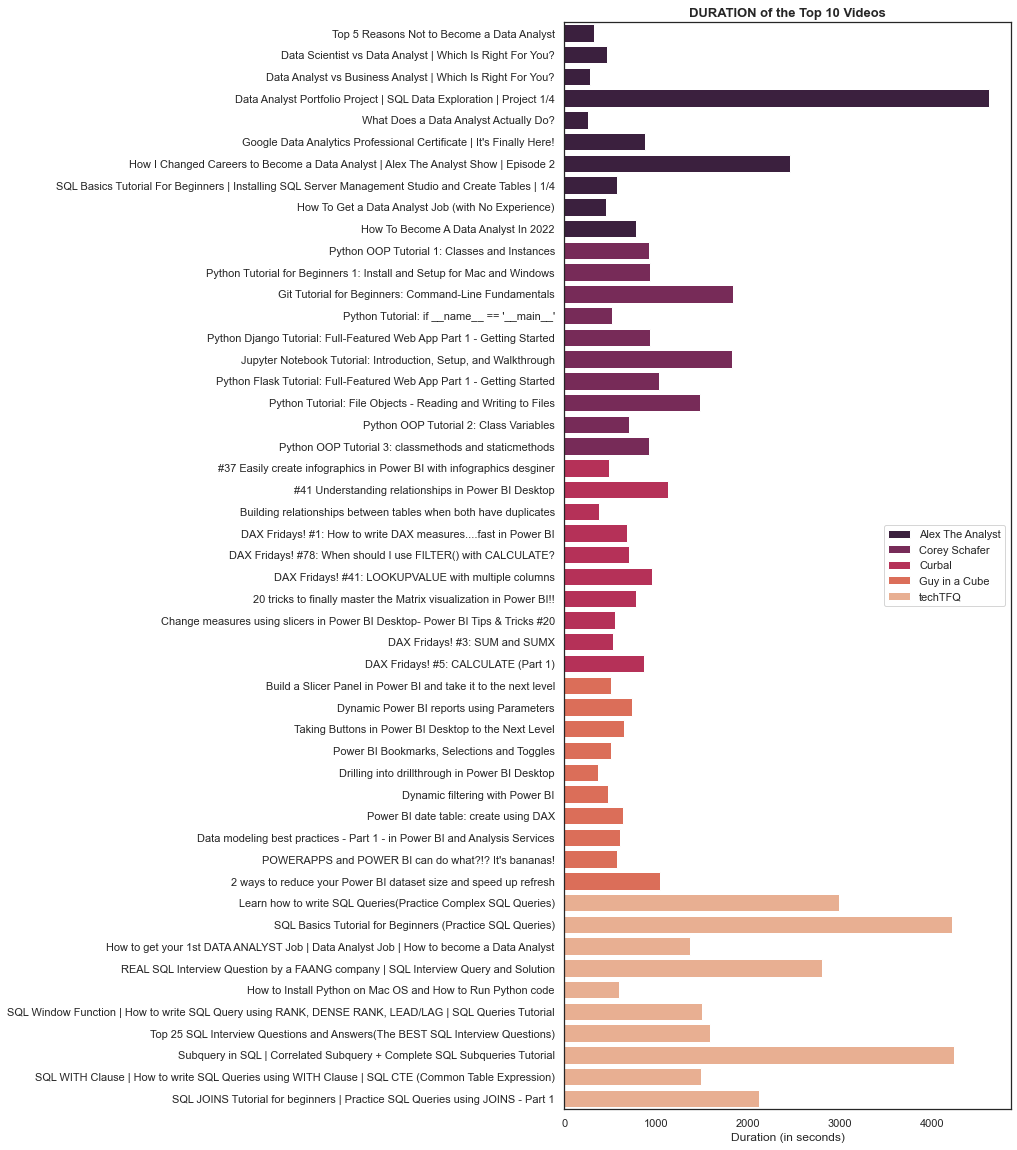

In [33]:
# Plotting the videos duration
sns.set(rc = {'figure.figsize': (8, 20)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Video_duration', y = 'Video_title', hue = 'Channel_name', data = top10_videos, palette = 'rocket', dodge = False)
ax.set_title('DURATION of the Top 10 Videos', weight = 'semibold').set_fontsize('13')
ax.set_xlabel('Duration (in seconds)')
ax.set_ylabel(None)
ax.legend().set_title(None)
plt.show()


---

Now, let's understand the averages at channels level considering all videos:
- Views
- Likes 
- Comments
- Videos duration

In [38]:
# Calculating averages at the channels level
df_videos_avg = df_videos_stats.groupby('Channel_name', as_index = False).mean()
df_videos_avg


,Channel_name,Video_duration,Video_views,Video_likes,Video_comments
0,Alex The Analyst,1126.081481,54.643252,1763.622222,178.303704
1,Corey Schafer,1226.708696,306.874117,6810.686957,332.039130
2,Curbal,564.869116,13.735109,217.96092,49.000000
3,Guy in a Cube,445.055556,25.605352,487.803523,42.537940
4,techTFQ,1571.351852,46.667074,1306.425926,134.000000


Average __views__:

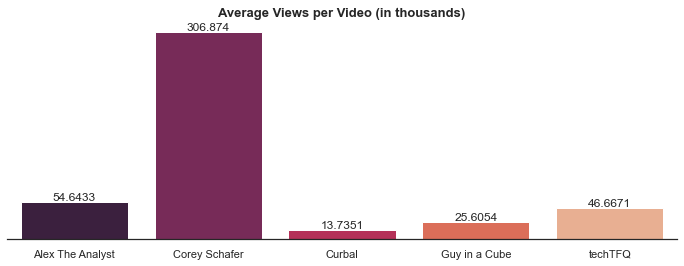

In [39]:
# Visualising the average views per video and channel
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel_name', y = 'Video_views', data = df_videos_avg, palette = 'rocket')
ax.set_title('Average Views per Video (in thousands)', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


Average __likes__:

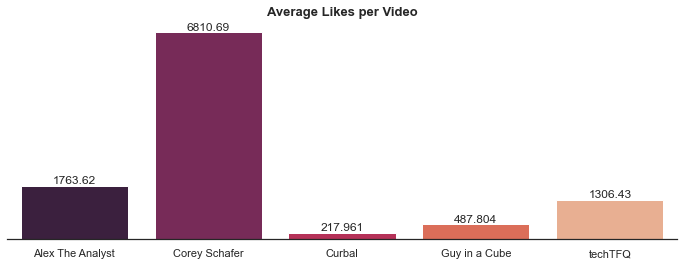

In [40]:
# Visualising the average likes per video and channel
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel_name', y = 'Video_likes', data = df_videos_avg, palette = 'rocket')
ax.set_title('Average Likes per Video', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


Average __comments__:

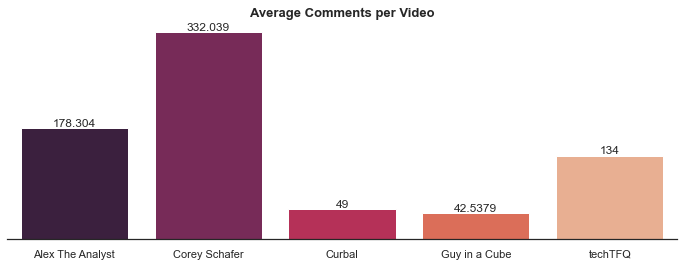

In [41]:
# Visualising the average comments per video and channel
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel_name', y = 'Video_comments', data = df_videos_avg, palette = 'rocket')
ax.set_title('Average Comments per Video', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


Average __duration__:

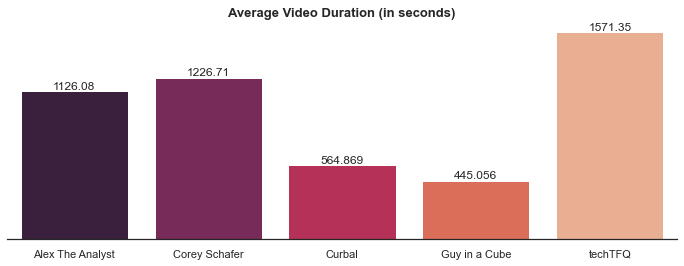

In [42]:
# Visualising the average video duration per channel
sns.set(rc = {'figure.figsize': (12, 4)})
sns.set_style(style = 'white') 
ax = sns.barplot(x = 'Channel_name', y = 'Video_duration', data = df_videos_avg, palette = 'rocket')
ax.set_title('Average Video Duration (in seconds)', weight = 'semibold').set_fontsize('13')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks([])
ax.grid(False)
sns.despine(left = True, bottom = False)
for i in ax.containers:
    ax.bar_label(i)


---

Understanding the correlations in the videos average data:

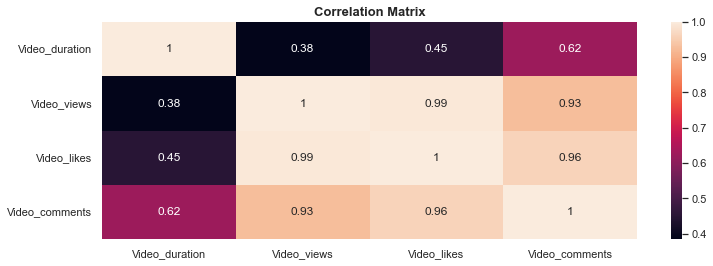

In [43]:
# Generating a correlation matrix
ax = sns.heatmap(df_videos_avg.corr(), annot= True)
ax.set_title('Correlation Matrix', weight = 'semibold').set_fontsize('13')


All variables are positively correlated, with __likes__ and __views__ haiing the highest correlation.

---

Having observed the correlations above, let's find out the percentage of __views__ that result in __likes__ (Likes to Views ratio):

In [44]:
# Calculating the Likes to Views ratio
df_videos_stats['Likes_to_views'] = round((df_videos_stats['Video_likes'] / (df_videos_stats['Video_views'] * 1000)) * 100, 2) # Views are multiplied by 1000 here because it had been divided by this same number in the beginning of the analysis (for simplicity) 
df_videos_stats.head()


,Channel_name,Channel_id,Video_title,Video_id,Video_duration,Video_publication,Video_views,Video_likes,Video_comments,Video_tags,Likes_to_views
0,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,Can Patrick handle the challenge???,twsuBaiPaCk,413.0,2022-03-23,2.979,158,10,"[advanced excel, excel tips and tricks, how to...",5.3
1,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,REPLAY Power BI tips from the Pros - LIVE (Mar...,twsuBaiPaCk,4587.0,2022-03-19,3.792,73,2,"[power bi, power bi desktop, power bi premium,...",1.93
2,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,Some tips for your data labels in Power BI,twsuBaiPaCk,268.0,2022-03-17,8.056,267,13,"[business intelligence, data analytics, introd...",3.31
3,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,"So, we just wait???",twsuBaiPaCk,271.0,2022-03-16,3.856,137,14,"[business intelligence, dataflows, dataflows i...",3.55
4,Guy in a Cube,UCFp1vaKzpfvoGai0vE5VJ0w,Revisiting a Power BI solution with Dynamic M ...,twsuBaiPaCk,383.0,2022-03-10,12.376,303,11,"[power bi, power bi dashboard, power bi demo, ...",2.45


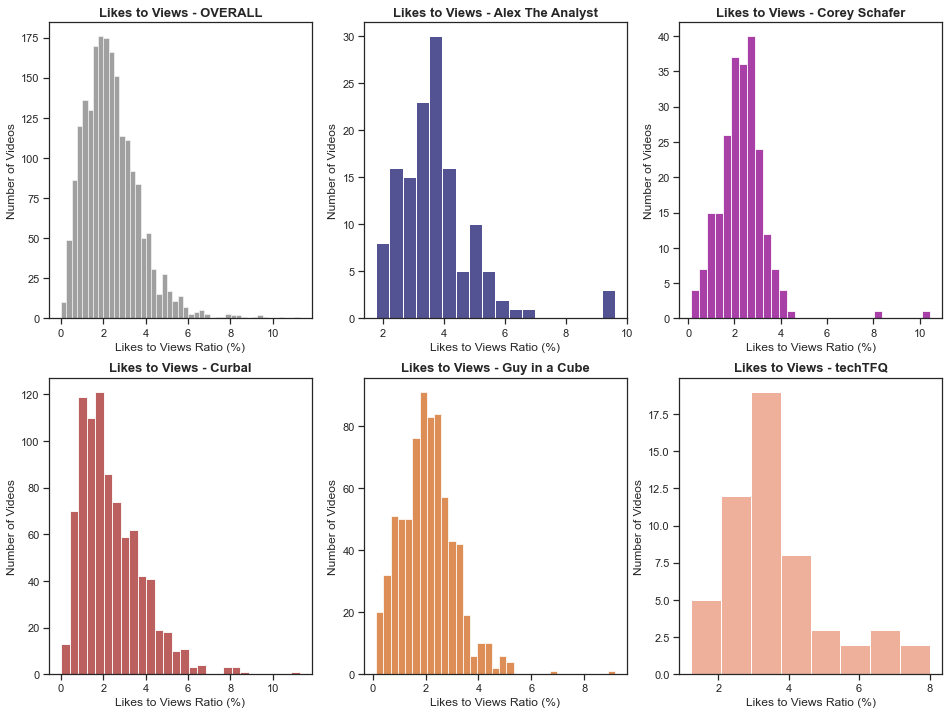

In [45]:
# Visualising the Likes to Views ratio: overall and at the level of each channel
sns.set(style="ticks")

fig, axs = plt.subplots(2, 3, figsize = (16, 12))

overall = sns.histplot(data = df_videos_stats, x = 'Likes_to_views', color="grey", ax=axs[0, 0])
overall.set_title('Likes to Views - OVERALL', weight = 'semibold').set_fontsize('13')
overall.set_xlabel('Likes to Views Ratio (%)')
overall.set_ylabel('Number of Videos')

alex_the_analyst = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name']== 'Alex The Analyst'], x = 'Likes_to_views', color = 'midnightblue', ax=axs[0, 1])
alex_the_analyst.set_title('Likes to Views - Alex The Analyst', weight = 'semibold').set_fontsize('13')
alex_the_analyst.set_xlabel('Likes to Views Ratio (%)')
alex_the_analyst.set_ylabel('Number of Videos')

corey_schafer = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name']== 'Corey Schafer'], x = 'Likes_to_views', color = 'darkmagenta', ax=axs[0, 2])
corey_schafer.set_title('Likes to Views - Corey Schafer', weight = 'semibold').set_fontsize('13')
corey_schafer.set_xlabel('Likes to Views Ratio (%)')
corey_schafer.set_ylabel('Number of Videos')

curbal = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name']== 'Curbal'], x = 'Likes_to_views', color = 'brown', ax=axs[1, 0])
curbal.set_title('Likes to Views - Curbal', weight = 'semibold').set_fontsize('13')
curbal.set_xlabel('Likes to Views Ratio (%)')
curbal.set_ylabel('Number of Videos')

guy_in_a_cube = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name']== 'Guy in a Cube'], x = 'Likes_to_views', color = 'chocolate', ax=axs[1, 1])
guy_in_a_cube.set_title('Likes to Views - Guy in a Cube', weight = 'semibold').set_fontsize('13')
guy_in_a_cube.set_xlabel('Likes to Views Ratio (%)')
guy_in_a_cube.set_ylabel('Number of Videos')

techTFQ = sns.histplot(data = df_videos_stats[df_videos_stats['Channel_name']== 'techTFQ'], x = 'Likes_to_views', color = 'darksalmon', ax=axs[1, 2])
techTFQ.set_title('Likes to Views - techTFQ', weight = 'semibold').set_fontsize('13')
techTFQ.set_xlabel('Likes to Views Ratio (%)')
techTFQ.set_ylabel('Number of Videos')

plt.show()


---

Reference:
- https://www.youtube.com/watch?v=SwSbnmqk3zY